# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

# Choosing the Best Location to Open a Turkish Restaurant in Bucharest, Romania

### Table of Contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

### Background

Bucharest is the capital and largest city of Romania, as well as its cultural, industrial, and financial center. It is located in the southeast of the country, at coordinates:  44°25′57″N 26°06′14″E, less than 60 km (37.3 mi) north of the Danube River and the Bulgarian border.  

Bucharest is the center of the Romanian economy and industry, accounting for around 24% (2017) of the country's GDP and about one-quarter of its industrial production, while being inhabited by 9% of the country's population. Bucharest has 1.883.425 (2018) populations and consists of 6 sectors. Neighborhoods and populations in sectors are as below (2016): 

*	Sector 1 (population 227,717): Dorobanți, Băneasa, Aviației, Pipera, Primăverii, Dămăroaia, Grivița
*	Sector 2 (population 357,338): Pantelimon, Colentina, Iancului, Tei, Floreasca, Moșilor, Obor, Fundeni, 
*	Sector 3 (population 399,231): Vitan, Dudești, Titan, Centrul Civic, Dristor, Lipscani
*	Sector 4 (population 300,331): Berceni, Olteniței,  Progresul, Văcărești, Tineretului
*	Sector 5 (population 288,690): Rahova, Ferentari, Giurgiului, Cotroceni, 13 Septembrie, Dealul Spirii
*	Sector 6 (population 371,060): Giulești, Crângași, Drumul Taberei, Militari, Grozăvești(Regie), Ghencea

As stated by the Mercer international surveys for quality of life in 231 cities around the world, Bucharest occupied the 109th place in 2019. Bucharest, at number 109, ranks low in the European list but better than other European cities such as Sofia (116th) and Belgrade (139th).

Many neighborhoods, particularly in the southern part of the city, lack sufficient green space, are formed of cramped high density block of flats. This may affect people’s life as well. 



### Problem

This project aims to select the best location in Bucharest, Romania for opening a Turkish restaurant. 

### Interest

This project would be of interest to any entrepreneur who wants to open a new Turkish restaurant in Bucharest, Romania. In addition, the project can be modified for use to determine the best location to open a restaurant in any geeographic location, and thus would be of interest more widely for any one who wants to open a restaurant or even any business where location is a key factor to the success of the business. 

## Data <a name="data"></a>

### Data Sources

To answer the business problem I will utilise the below data sources:
    
* Sector data of Bucharest - from Wikipedia
* Neighbourhood data of Bucharest - from Wikipedia
* Geographical coordinates of neighborhoods - retrieved using Python geocoder library 
* Venues of given neighborhoods of Bucharest - retrieved using Foursquare API venues explore method 
* Ranks and likes of restaurants by given venue id - retrieved using Foursquare API venues method 

### Feature Selection and Data Usage

* I will use neighborhood location values to analyse Bucharest's geographical structure. I will use folium library of python to draw maps by using given latitude and longitudes of neighborhoods 
* I will use populations of neighborhoods to determine neighbourhoods with large-sized populations whichh may need a new restaurant
* I will also classify neighborhoods by using venues distribution and counts. In this way, I will find similarities between neighborhoods which will help me to choose a location for opening a new restaurant. Similarly structured neighborhoods may be conducive to the same type of venue/restaurant/business
* I will use venue list category to find distribution of restaurants and Turkish restaurants in neighborhoods
* I will also use ratings and likes of restaurants in the areas. This will help to find locations with poorly rated restaurants which may consequently desire the introduction of a new restaurant

#### Import Libraries

In [1]:
#install libraries 
!pip install geopy    
!pip install folium   
!pip install geocoder

     |████████████████████████████████| 102kB 7.7MB/s ta 0:00:011
     |████████████████████████████████| 102kB 7.6MB/s ta 0:00:011


In [2]:
#import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

# main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/
# how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k video
from bs4 import BeautifulSoup 
import pandas as pd
import requests

print('Libraries imported.')

Libraries imported.


#### Get Geocoordinates of Bucharest, Romania

In [3]:
# get coordinates of Bucharest
bucharest_address = 'Bucharest, Romania'

geolocator = Nominatim(user_agent="bucharest_explorer")
location = geolocator.geocode(bucharest_address)
latitude = location.latitude
longitude = location.longitude
bucharest_center = [latitude, longitude ]
print('The geograpical coordinate of {} are {}, {}.'.format(bucharest_address, latitude, longitude))

The geograpical coordinate of Bucharest, Romania are 44.4361414, 26.1027202.


#### Get Neighbourhood Data of Bucharest

In [4]:
# Read Bucharest neighborhood data 
url = "https://en.wikipedia.org/wiki/Category:Districts of Bucharest"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text.replace(', Bucharest',''))
    
df_neighborhood = pd.DataFrame({"Neighborhood": neighborhoodList})
print("There are {} neighborhoods in {}".format(df_neighborhood.shape[0], bucharest_address))

There are 40 neighborhoods in Bucharest, Romania


#### Get Neighbourhood Sectors and Population of Sectors

In [5]:
# Read Bucharest sector data from wikipedia
url = "https://en.wikipedia.org/wiki/Sectors of Bucharest"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

sectorPopList = []
sectorPopulationList = []

for row in soup.find_all("tbody"):
    header = str(row.findAll("th"))
    if "Population (October 2011)" in header:
        i = 0
        for td in row.find_all("td"):
            i+=1
            if i==2: 
                sectorPopList.append(td.text.replace("\n",""))
            if i==3: 
                sectorPopulationList.append(td.text.replace("\n",""))    
                i=0

df_sectorPop = pd.DataFrame({"Sector": sectorPopList, "Population": sectorPopulationList})

sectorNeigList =[]
sectorNeigborList =[]

for row in soup.find_all("ul"):
    if sectorPopList[0] in  row.text:
        for s in row.text.split("\n"):
            sectorNeigList.append(s.split(":")[0])
            sectorNeigborList.append(s.split(":")[1])
    
df_sector= pd.DataFrame({"Sector": sectorNeigList, "Neigborhoods": sectorNeigborList}).merge(df_sectorPop,on='Sector' )

print("There are {} Sectors in {}".format(df_sector.shape[0], bucharest_address))
df_sector

There are 6 Sectors in Bucharest, Romania


,Sector,Neigborhoods,Population
0,Sector 1,"Dorobanți, Băneasa, Aviației, Pipera, Aviator...","225,454"
1,Sector 2,"Pantelimon, Colentina, Iancului, Tei, Floreas...","345,370"
2,Sector 3,"Vitan, Dudești, Titan, Centrul Civic, Balta A...","385,439"
3,Sector 4,"Berceni, Olteniței, Văcărești, Timpuri Noi, T...","287,828"
4,Sector 5,"Rahova, Ferentari, Giurgiului, Cotroceni, 13 ...","271,575"
5,Sector 6,"Giulești, Crângași, Drumul Taberei, Militari,...","367,760"


#### Set Sectors of Neighbourhoods

In [6]:
def getSector(row):
    for i in range(df_sector.shape[0]):
        if row["Neighborhood"] in  df_sector.iloc[i].Neigborhoods:
            return pd.Series([df_sector.iloc[i].Sector, df_sector.iloc[i].Population], index = ['Sector','SectorPopulation'])

df_neighborhood[["Sector","SectorPopulation"]] =df_neighborhood.apply(getSector, axis=1)
df_neighborhood.head(5)

,Neighborhood,Sector,SectorPopulation
0,Aviației,Sector 1,"225,454"
1,Băneasa,Sector 1,"225,454"
2,Berceni,Sector 4,"287,828"
3,Bucureștii Noi,Sector 1,"225,454"
4,Centrul Civic,Sector 3,"385,439"


#### Get Geographical Coordinates of Neighbourhoods

In [7]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,bucharest_address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in df_neighborhood["Neighborhood"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df_neighborhood['Latitude'] = df_coords['Latitude']
df_neighborhood['Longitude'] = df_coords['Longitude']
print("Geographical coordinates of five neighborhoods are as below")
df_neighborhood.head()

Geographical coordinates of five neighborhoods are as below


,Neighborhood,Sector,SectorPopulation,Latitude,Longitude
0,Aviației,Sector 1,"225,454",44.485790,26.101220
1,Băneasa,Sector 1,"225,454",44.494010,26.080372
2,Berceni,Sector 4,"287,828",44.386200,26.128960
3,Bucureștii Noi,Sector 1,"225,454",44.484495,26.039608
4,Centrul Civic,Sector 3,"385,439",44.434300,26.094660


#### Create Bucharest Map with Neighbourhoods Superimposed

In [8]:
#create map of Bucharest neighborhoods using latitude and longitude values
map_bucharest= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  neighborhood in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bucharest)  
    
map_bucharest

#### Explore Venues in Bucharest Neighbourhoods

In [9]:
# The code was removed by Watson Studio for sharing.

In [10]:
LIMIT = 100

def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id=USELJRHVN1R41XO1ZW1HOO2NOK32234A3VR5CCDCET5AX1RG&client_secret=GJ512QPIGSHZRWHOZWHMQEFIGBUHSAQ5L15ZWTWCN3JDXS5T&v=20200711&ll=44.4361414,26.1027202&radius=10000&limit=100".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venues = getNeighborhoodVenues (df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues['VenueCategory'].unique())))
neighborhood_venues.head()

There are 47 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Aviației,44.48579,26.10122,"Teatrul Național ""I. L. Caragiale""",4ba85262f964a52079d639e3,44.436570,26.103638,87,Theater
1,Aviației,44.48579,26.10122,Cărturești Carusel,5377cb5111d2b93afe516785,44.431918,26.101617,478,Bookstore
2,Aviației,44.48579,26.10122,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place
3,Aviației,44.48579,26.10122,Antic ExLibris,4f61ab7be4b0a20e1dfe4145,44.433489,26.102379,296,Used Bookstore
4,Aviației,44.48579,26.10122,Grand Hotel Continental,4bcf72440ffdce72e67cb2c0,44.437294,26.098081,390,Hotel


In [11]:
print('Top 10 distinct venue counts are as below')
neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Coffee Shop,18
Hotel,6
Dessert Shop,6
Pizza Place,3
Park,3
Bar,3
Romanian Restaurant,3
Burger Joint,3
Café,3


#### Filter Restaurants Out of All Venues

In [12]:
restaurant_list =['Restaurant', 'Burger Joint','Café','Fried Chicken Joint','Pizza Place']
turkish_restaurant_list = ['Turkish Restaurant', 'Doner Restaurant']

# Filter restaurants 
    
neighborhood_venues['RestFlag']=False
for restCat in restaurant_list:
    neighborhood_venues['RestFlag'] = neighborhood_venues['RestFlag'] | neighborhood_venues['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues[neighborhood_venues['RestFlag'] == True].iloc[:,:-1]
turkish_restaurants = neighborhood_restaurants[ neighborhood_restaurants['VenueCategory'].isin(turkish_restaurant_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['VenueCategory'].isin(turkish_restaurant_list) ]

print('Total number of restaurants:', len(neighborhood_restaurants['VenueId'].unique()))
print('Total number of Turkish restaurants:', len(turkish_restaurants['VenueId'].unique()))
print('Percentage of Turkish restaurants: {:.2f}%'.format(len(turkish_restaurants['VenueId'].unique()) / len(neighborhood_restaurants['VenueId'].unique()) * 100))

Total number of restaurants: 22
Total number of Turkish restaurants: 0
Percentage of Turkish restaurants: 0.00%


40 neighborhoods do not have any Turkish restaurant


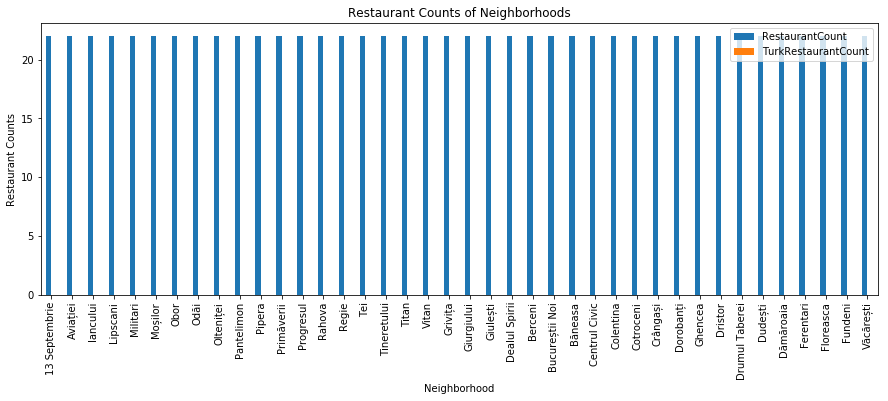

In [13]:
# get counts of restaurants in each Neighborhood
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of Turkish restaurants in each Neighborhood
df_turk_rest_counts =  turkish_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "TurkRestaurantCount"})[['TurkRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(turkish_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_turk_rest_counts = df_turk_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'TurkRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_turk_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_turk_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any Turkish restaurant'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','TurkRestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()

We can see from the Graph :

* The number of restaurants in neighbourhoods is largely consistent across the different neighbourhoods
* There is an absence of Turkish restaurants in all neighbourhoods, thus suggesting a market gap
* Any of the neighbourhoods would consequently be suitable for opening a new Turkish restaurant. To filter more, let's continue

#### Get Restaurants' Overall Rating

In [31]:
def getVenueRatings(venues):
    
    ratings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id=USELJRHVN1R41XO1ZW1HOO2NOK32234A3VR5CCDCET5AX1RG&client_secret=GJ512QPIGSHZRWHOZWHMQEFIGBUHSAQ5L15ZWTWCN3JDXS5T&v=20200711'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        ratings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(ratings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_ratings = getVenueRatings(neighborhood_restaurants['VenueId'].drop_duplicates())
restaurants_ratings.head()

,VenueId,VenueRating,VenueLikes
0,584eb605f9edc530cd730d3b,9.0,42.0
1,58a9c9350393cc231e776d73,8.8,169.0
2,59089c6b535d6f4b57d0b699,9.2,23.0
3,4bc9e18cfb84c9b68eca1b3e,8.5,604.0
4,56a40097498e12d32c477347,NaN,NaN
5,4db2d15d6a23c31a02f32f6b,NaN,NaN
6,4cc6cc1ab2beb1f783492a4c,NaN,NaN
7,53e8aad7498e9b45f8e16d57,NaN,NaN
8,4b6c66f0f964a52014372ce3,NaN,NaN
9,4d2f33f194013704a32eedda,NaN,NaN


In [21]:
#merge ratings to restaurants 
neighborhood_restaurants = neighborhood_restaurants.merge(restaurants_ratings)
neighborhood_restaurants.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Aviației,44.485790,26.101220,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42
1,Băneasa,44.494010,26.080372,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42
2,Berceni,44.386200,26.128960,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42
3,Bucureștii Noi,44.484495,26.039608,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42
4,Centrul Civic,44.434300,26.094660,buoni e bravi,584eb605f9edc530cd730d3b,44.436532,26.106657,315,Pizza Place,9.0,42


#### Show Restaurants on Head Map

Let's create a map showing heatmap / density of restaurants and try to extract some meaningfull information from that. Also, let's show borders of Bucharest on our map and a few circles indicating distance of 2km, 4km, 6km and 10km from Bucharest center

Purple markers are restaurants

Blue markers are restaurants with rating less than 7 restaurants

In [29]:
bucharest_center = [latitude, longitude]
map_restaurant= folium.Map(location=bucharest_center, zoom_start=12)
df_neighborhood_noturkrest = df_neighborhood[df_neighborhood['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_bucharest) 
HeatMap(neighborhood_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(bucharest_center).add_to(map_bucharest)
folium.Circle(bucharest_center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig, name in zip(neighborhood_restaurants['VenueLatitude'], neighborhood_restaurants['VenueLongitude'], neighborhood_restaurants['Neighborhood'], neighborhood_restaurants['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_restaurant)
       
rating_lt_7 = neighborhood_restaurants[neighborhood_restaurants['VenueRating'] <7]
for lat, lon, neig, name in zip(rating_lt_7['VenueLatitude'], rating_lt_7['VenueLongitude'], rating_lt_7['Neighborhood'], rating_lt_7['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_restaurant)        
map_restaurant

From the heat map , we can see that there are:

* Too many restaurants in 2 km to the center
* Enough restaurants between 2-4 km to the center
* There are not many restaurants after 6 - 10 km to center
* Turkish restaurants are superimposed with red and blue dots. Blue dots are Turkish restaurant with raiting <7
* Turkish restaurants are located in South, North , East, between 2-4 Km distance around center
* There are not Turkish Restaurants in West Part.
* 3 Turkish restaurants gets bad points. That means people does not prefer these restaurant too much and any turkish restaurant may be opened around